# Hi! This is my code for protein classification. 
### Given a sequence of amino acids (there's about 20 unique amino acids) the Bi-Directional LSTM has to predict the function (20 different ones) of that protein!

In [1]:
#Import stuff for dataprocessing
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Import the data. seq has all the sequences of the DNA while the no_dups has the function
no_dups = pd.read_csv("../input/protein-data-set/pdb_data_no_dups.csv")
seq = pd.read_csv("../input/protein-data-set/pdb_data_seq.csv")

In [3]:
#lookin at what's inside
no_dups.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0


In [4]:
#looks like they have DNA, DNA/RNA Hybrids and Proteins... So I'll filter for just protein because that should simplify things... Plus I'm doing protein folding after all
no_dups_proteins = no_dups[no_dups.macromoleculeType == "Protein"]
seq_proteins = seq[seq.macromoleculeType == "Protein"]

In [5]:
#Make sure everything only proteins
no_dups_proteins.head(), seq_proteins.head()

(  structureId         classification experimentalTechnique macromoleculeType  \
 2        101M       OXYGEN TRANSPORT     X-RAY DIFFRACTION           Protein   
 4        102L  HYDROLASE(O-GLYCOSYL)     X-RAY DIFFRACTION           Protein   
 5        102M       OXYGEN TRANSPORT     X-RAY DIFFRACTION           Protein   
 7        103L  HYDROLASE(O-GLYCOSYL)     X-RAY DIFFRACTION           Protein   
 8        103M       OXYGEN TRANSPORT     X-RAY DIFFRACTION           Protein   
 
    residueCount  resolution  structureMolecularWeight crystallizationMethod  \
 2           154        2.07                  18112.80                   NaN   
 4           165        1.74                  18926.61                   NaN   
 5           154        1.84                  18010.64                   NaN   
 7           167        1.90                  19092.72                   NaN   
 8           154        2.07                  18093.78                   NaN   
 
    crystallizationTempK  dens

In [6]:
#Finding how many unique proteins and functions there are
no_dups_proteins['classification'].nunique(), no_dups_proteins['structureId'].nunique()

(4468, 127387)

In [7]:
#Another package for dataprocessing
import seaborn as sns

In [8]:
#Let's find the function and see how many proteins are attatched to each
h = no_dups_proteins['classification'].value_counts();h

HYDROLASE                                  20425
TRANSFERASE                                15393
OXIDOREDUCTASE                             12216
LYASE                                       4256
IMMUNE SYSTEM                               3997
                                           ...  
rim-binding protein                            1
COMPLEX (ISOMERASE/PROTEIN KINASE)             1
TRANSPORT PROTEIN/CHAPERONE                    1
TRANSCRIPTION/PROTEIN BINDING/INHIBITOR        1
SIGNAL                                         1
Name: classification, Length: 4468, dtype: int64

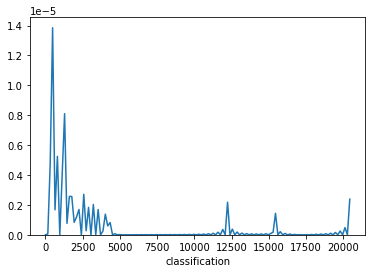

In [9]:
#Plotin the distribution of the classification of stuff. There seems to be a lot of things that are classificed only a few times... 
#That won't help out the model. So I'll kick them out....
sns.distplot(h, hist= False)

In [10]:
#Tried to merge them just like that... Didn't work because 2 columns were overlapping and it throw a fit... So I'll kick out all irrelevent info
new_no_dups = no_dups_proteins[['structureId', "classification"]]
new_seq = seq_proteins[['structureId', 'sequence']]

In [11]:
new_no_dups.head(), new_seq.head()

(  structureId         classification
 2        101M       OXYGEN TRANSPORT
 4        102L  HYDROLASE(O-GLYCOSYL)
 5        102M       OXYGEN TRANSPORT
 7        103L  HYDROLASE(O-GLYCOSYL)
 8        103M       OXYGEN TRANSPORT,
    structureId                                           sequence
 4         101M  MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
 7         102L  MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
 8         102M  MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
 11        103L  MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
 12        103M  MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...)

In [12]:
#I'll merge now
gonna_be_cut_down_one = new_no_dups.set_index('structureId').join(new_seq.set_index('structureId'))

In [13]:
#It works!!!!
gonna_be_cut_down_one.head()

,classification,sequence
structureId,,
101M,OXYGEN TRANSPORT,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
102L,HYDROLASE(O-GLYCOSYL),MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
102M,OXYGEN TRANSPORT,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
103L,HYDROLASE(O-GLYCOSYL),MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
103M,OXYGEN TRANSPORT,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


In [14]:
#Let's see how the function of how high the bar I set versus the amount that make it in (aka have that many proteins)
for x in range(50):
    print(5000-(x * 100),len(h[h > (5000-(x * 100))]))

5000 3
4900 3
4800 3
4700 3
4600 3
4500 3
4400 3
4300 3
4200 4
4100 4
4000 4
3900 5
3800 5
3700 5
3600 5
3500 5
3400 6
3300 6
3200 6
3100 7
3000 7
2900 7
2800 8
2700 8
2600 9
2500 10
2400 10
2300 10
2200 11
2100 11
2000 12
1900 12
1800 13
1700 14
1600 16
1500 16
1400 17
1300 19
1200 23
1100 25
1000 25
900 25
800 27
700 29
600 30
500 32
400 39
300 43
200 59
100 80


In [15]:
#The ones that stay are over 1300
stay = np.asarray(h[(h > 1300)].index)

new = gonna_be_cut_down_one[gonna_be_cut_down_one.classification.isin(stay)]

new.describe()

,classification,sequence
count,225223,225221
unique,19,58603
top,HYDROLASE,KVFGRCELAAAMKRHGLDNYRGYSLGNWVCAAKFESNFNTQATNRN...
freq,46336,596


In [16]:
#There are nulls here. Gotta shove them out
new = new.dropna()

In [17]:
#They both match now
new.describe()

,classification,sequence
count,225221,225221
unique,19,58603
top,HYDROLASE,KVFGRCELAAAMKRHGLDNYRGYSLGNWVCAAKFESNFNTQATNRN...
freq,46336,596


In [18]:
new.head()

,classification,sequence
structureId,,
10GS,TRANSFERASE/TRANSFERASE INHIBITOR,PPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKAS...
10GS,TRANSFERASE/TRANSFERASE INHIBITOR,PPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKAS...
117E,HYDROLASE,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...
117E,HYDROLASE,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...
11AS,LIGASE,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...


In [19]:
#Shoot. Looks like the duplicates got in... I'll remove it now
new = new.drop_duplicates()


In [20]:
#Yay it works
new.head()

,classification,sequence
structureId,,
10GS,TRANSFERASE/TRANSFERASE INHIBITOR,PPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKAS...
117E,HYDROLASE,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...
11AS,LIGASE,MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQD...
11BA,HYDROLASE,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...
11GS,TRANSFERASE,MPPYTVVYFPVRGRCAALRMLLADQGQSWKEEVVTVETWQEGSLKA...


In [21]:
# Import packages for the real business (ML)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torchtext.data import Field, TabularDataset, BucketIterator

In [22]:
#Splitting it to a train test... To make sure I know the true accuracy of it
from sklearn.model_selection import train_test_split

train, valid = train_test_split(new, train_size = 0.9)

In [23]:
#Tokenizers... AKA the thing that will break up my sequences into what I'll feed into the LSTM
tokenize = lambda x: list(str(x))

In [24]:
#Test it out - It works

tokenize(['hihihi'])

['[', "'", 'h', 'i', 'h', 'i', 'h', 'i', "'", ']']

In [25]:
#This will come in handy later on... Basically labels stuff to then execute some functions on it
TEXT = Field(tokenize=tokenize,batch_first=True,include_lengths=True)
LABEL = Field(sequential=False, use_vocab=True)

/opt/conda/lib/python3.7/site-packages/torchtext/data/field.py:150: UserWarning: Field class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [26]:
#Since TabularDataset won't take in our Pandas Dataframe (instead takes in CSVs) We're just gonna convert it to CSVs
train.to_csv("Protein_train.csv")
valid.to_csv("Protein_test.csv")

In [27]:
#Defining the fields for the next part...
fields = [('structureId', None),('classification', LABEL), ('sequence', TEXT)]

In [28]:
#Now we can create our dataset of train and valids, with the fields attatched to them... Then shove it into the iterator
train_thing, valid_thing = TabularDataset.splits(path="./", train='Protein_train.csv', validation="Protein_test.csv", format='CSV', fields=fields, skip_header=True)

/opt/conda/lib/python3.7/site-packages/torchtext/data/example.py:68: UserWarning: Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.', UserWarning)
/opt/conda/lib/python3.7/site-packages/torchtext/data/example.py:78: UserWarning: Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('Example class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.', UserWarning)


In [29]:
#It works!!!!
train_thing[0], train_thing[0].__dict__.keys(), train_thing[1].sequence

(<torchtext.data.example.Example at 0x7f49c45c56d0>,
 dict_keys(['classification', 'sequence']),
 ['A',
  'D',
  'P',
  'G',
  'G',
  'S',
  'H',
  'H',
  'H',
  'H',
  'H',
  'S',
  'R',
  'K',
  'T',
  'Y',
  'T',
  'L',
  'T',
  'D',
  'Y',
  'L',
  'K',
  'N',
  'T',
  'Y',
  'R',
  'L',
  'K',
  'L',
  'Y',
  'S',
  'L',
  'R',
  'W',
  'I',
  'S',
  'D',
  'H',
  'E',
  'Y',
  'L',
  'Y',
  'K',
  'Q',
  'E',
  'N',
  'N',
  'I',
  'L',
  'V',
  'F',
  'N',
  'A',
  'E',
  'Y',
  'G',
  'N',
  'S',
  'S',
  'V',
  'F',
  'L',
  'E',
  'N',
  'S',
  'T',
  'F',
  'D',
  'E',
  'F',
  'G',
  'H',
  'S',
  'I',
  'N',
  'D',
  'Y',
  'S',
  'I',
  'S',
  'P',
  'D',
  'G',
  'Q',
  'F',
  'I',
  'L',
  'L',
  'E',
  'Y',
  'N',
  'Y',
  'V',
  'K',
  'Q',
  'W',
  'R',
  'H',
  'S',
  'Y',
  'T',
  'A',
  'S',
  'Y',
  'D',
  'I',
  'Y',
  'D',
  'L',
  'N',
  'K',
  'R',
  'Q',
  'L',
  'I',
  'T',
  'E',
  'E',
  'R',
  'I',
  'P',
  'N',
  'N',
  'T',
  'Q',
  'W',
  'V',
  'T',


In [30]:
device = 'cuda'
bs = 64

In [31]:
#Puts similar things together and then pads them... Plus preps them for iteration so we can shove it into the model with little friction
train_iter = BucketIterator(train_thing, batch_size=bs, sort_key=lambda x: len(x.sequence),
                            device=device, sort=True, sort_within_batch=True)
valid_iter = BucketIterator(valid_thing, batch_size=bs, sort_key=lambda x: len(x.sequence),
                            device=device, sort=True, sort_within_batch=True)

/opt/conda/lib/python3.7/site-packages/torchtext/data/iterator.py:48: UserWarning: BucketIterator class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


In [32]:
#Make the vocab for the fields... AKA the embedding layers
TEXT.build_vocab(train_thing)
LABEL.build_vocab(train_thing)

In [33]:
#We're creating the LSTMmodel!!!
class LSTMmodel(nn.Module):
    #On initialization we're gonna make our LSTM + the linear layers
    def __init__(self, vocab_size, embedding_size, hidden_dim, layers, dropout):
        super().__init__()
        
        #The embedding Layer
        self.Embedding = nn.Embedding(vocab_size, embedding_size)
        
        #The Jewel: LSTM!!!
        self.LSTM = nn.LSTM(embedding_size, 
                            hidden_dim, 
                            num_layers=layers,
                            dropout=dropout,
                            batch_first=True,
                            bidirectional=True)
        
        #Some extra linear layers just for the hell of it
        self.layers = nn.Sequential(
            nn.Linear(hidden_dim * 2, 50),
            nn.BatchNorm1d(50),
            nn.Sigmoid(),
            nn.Linear(50, 20),
            nn.BatchNorm1d(20),
            nn.Sigmoid())
        
    def forward(self, text, text_len):
        #Pass our text into the the embeddng layer ()
        embed = self.Embedding(text)
        #Then we pack pad it... Essentially an optimzied way to pad our stuff without doing extra computations
        packed_embed = nn.utils.rnn.pack_padded_sequence(embed, text_len,batch_first=True)
        
        #Run it through the LSTM. The most valuable thing is h_n, which is the hidden state of the sequence
        outfeat, (h_n, c_n) = self.LSTM(packed_embed)
        
        #re-format it all
        proto_out = torch.cat((h_n[-2,:,:], h_n[-1,:,:]), dim = 1)
        
        #Put it through our linear layers
        
        outputs = self.layers(proto_out)
        
        return outputs
        

In [34]:
#Defining the model

model = LSTMmodel(len(TEXT.vocab), 100, 32, 4, 0.2)

In [35]:
#Check it out
print(model)

LSTMmodel(
  (Embedding): Embedding(27, 100)
  (LSTM): LSTM(100, 32, num_layers=4, batch_first=True, dropout=0.2, bidirectional=True)
  (layers): Sequential(
    (0): Linear(in_features=64, out_features=50, bias=True)
    (1): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Sigmoid()
    (3): Linear(in_features=50, out_features=20, bias=True)
    (4): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Sigmoid()
  )
)


In [36]:
#Look at how many parameters
total = 0
for param in model.parameters():
    if param.requires_grad:
        total += param.numel()

print(total)

116678


In [37]:
#Define the optimizer
optimizer = optim.Adam(model.parameters(), lr = 1e-3)

#Define the loss function
loss_func = nn.BCELoss()

#Define the metrics function
def accuracy(preds, target):
    correct = (preds == target).float()
    accuracy = correct.sum() / len(correct)
    return accuracy

In [38]:
#Shove stuff onto GPU
model = model.to(device)
loss_func = loss_func.to(device)

In [39]:
#Define the trianing function
def train(model, iterator, optimizer, loss_func):
    #Initializing them
    epoch_loss = 0
    epoch_accuracy = 0
    
    #Gets the model in training mode haha
    model.train()
    
    for batch in iterator:
        #Set the gradietns to 0
        optimizer.zero_grad()
        
        #Get the text and number of words to pass into model
        text, text_len = batch.sequence
        #Because it throws a fit otherwise
        text_len = text_len.cpu()
        
        #Shove it into model
        preds = model(text, text_len).squeeze()
        
        #Turn the target into one hot encoding
        onehot = F.one_hot(batch.classification,num_classes=20)
        
        #Find the loss
        loss = loss_func(preds, onehot.float())
        
        #Find the accuracy
        acc = accuracy(torch.argmax(preds, dim = 1).float(), batch.classification.float())
        
        #Backprop the loss and find the gradients
        loss.backward()
        #Then update all the weights
        optimizer.step()
        
        #Add in the loss and the accuracy
        epoch_loss += loss.item()
        epoch_accuracy += acc.item()
    
    #Return the loss and the accuracy
    return epoch_loss / len(iterator), epoch_accuracy / len(iterator)
        

In [40]:
#Define the test function

def test(model, iterator, loss_func):
    #Initializing them
    epoch_loss = 0
    epoch_accuracy = 0
    
    #There's an evaluation mode too
    model.eval()
    
    #So it doesn't add on to the memory to compute the gradients
    with torch.no_grad():
        for batch in iterator:

            #Get the text and number of words to pass into model
            text, text_len = batch.sequence
            #Because it throws a fit otherwise
            text_len = text_len.cpu()

            #Shove it into model
            preds = model(text, text_len).squeeze()

            #Turn the target into one hot encoding
            onehot = F.one_hot(batch.classification,num_classes=20)

            #Find the loss
            loss = loss_func(preds, onehot.float())

            #Find the accuracy
            acc = accuracy(torch.argmax(preds, dim = 1).float(), batch.classification.float())

            #Add in the loss and the accuracy
            epoch_loss += loss.item()
            epoch_accuracy += acc.item()

        #Return the loss and the accuracy
        return epoch_loss / len(iterator), epoch_accuracy / len(iterator)

In [41]:
import time

In [42]:
#Final Step! Cobbling everything together
start_time = time.time()

for epoch in range(15):
    epoch_start = time.time()
    #Train it
    train_loss, train_acc = train(model, train_iter, optimizer, loss_func)
    
    #Validate it
    valid_loss, valid_acc = test(model, valid_iter, loss_func)
    
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    print('Total Time for Epoch:', time.time() - epoch_start)

print("Total Time of all of this:", time.time() - start_time)

/opt/conda/lib/python3.7/site-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


	Train Loss: 0.577 | Train Acc: 16.97%
	 Val. Loss: 0.432 |  Val. Acc: 21.26%
Total Time for Epoch: 109.51424145698547
	Train Loss: 0.350 | Train Acc: 25.10%
	 Val. Loss: 0.292 |  Val. Acc: 26.88%
Total Time for Epoch: 108.95476603507996
	Train Loss: 0.258 | Train Acc: 28.89%
	 Val. Loss: 0.230 |  Val. Acc: 28.26%
Total Time for Epoch: 109.53878402709961
	Train Loss: 0.212 | Train Acc: 30.72%
	 Val. Loss: 0.199 |  Val. Acc: 27.57%
Total Time for Epoch: 109.03388047218323
	Train Loss: 0.188 | Train Acc: 32.07%
	 Val. Loss: 0.188 |  Val. Acc: 25.90%
Total Time for Epoch: 109.20695209503174
	Train Loss: 0.175 | Train Acc: 33.31%
	 Val. Loss: 0.174 |  Val. Acc: 29.75%
Total Time for Epoch: 108.65601754188538
	Train Loss: 0.167 | Train Acc: 34.30%
	 Val. Loss: 0.166 |  Val. Acc: 31.04%
Total Time for Epoch: 109.32505393028259
	Train Loss: 0.161 | Train Acc: 36.18%
	 Val. Loss: 0.163 |  Val. Acc: 32.98%
Total Time for Epoch: 109.5779013633728
	Train Loss: 0.156 | Train Acc: 37.56%
	 Val. Los

In [43]:
#Continue training but at lower LR rate
optimizer = optim.Adam(model.parameters(), lr = 0.0005)

start_time = time.time()

for epoch in range(20):
    epoch_start = time.time()
    #Train it
    train_loss, train_acc = train(model, train_iter, optimizer, loss_func)
    
    #Validate it
    valid_loss, valid_acc = test(model, valid_iter, loss_func)
    
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    print('Total Time for Epoch:', time.time() - epoch_start)

print("Total Time of all of this:", time.time() - start_time)

	Train Loss: 0.139 | Train Acc: 44.76%
	 Val. Loss: 0.144 |  Val. Acc: 40.97%
Total Time for Epoch: 110.25700545310974
	Train Loss: 0.137 | Train Acc: 45.74%
	 Val. Loss: 0.143 |  Val. Acc: 41.07%
Total Time for Epoch: 109.00415706634521
	Train Loss: 0.136 | Train Acc: 45.97%
	 Val. Loss: 0.143 |  Val. Acc: 40.90%
Total Time for Epoch: 109.22637820243835
	Train Loss: 0.134 | Train Acc: 46.92%
	 Val. Loss: 0.142 |  Val. Acc: 41.84%
Total Time for Epoch: 109.42888569831848
	Train Loss: 0.133 | Train Acc: 47.54%
	 Val. Loss: 0.142 |  Val. Acc: 42.09%
Total Time for Epoch: 108.80709290504456
	Train Loss: 0.132 | Train Acc: 47.86%
	 Val. Loss: 0.143 |  Val. Acc: 41.68%
Total Time for Epoch: 110.74929809570312
	Train Loss: 0.131 | Train Acc: 48.51%
	 Val. Loss: 0.142 |  Val. Acc: 42.04%
Total Time for Epoch: 109.62591814994812
	Train Loss: 0.130 | Train Acc: 49.22%
	 Val. Loss: 0.142 |  Val. Acc: 42.26%
Total Time for Epoch: 109.26461672782898
	Train Loss: 0.128 | Train Acc: 49.50%
	 Val. Lo

In [44]:
#Continue training but at lower LR rate
optimizer = optim.Adam(model.parameters(), lr = 0.0001)

start_time = time.time()

for epoch in range(25):
    epoch_start = time.time()
    #Train it
    train_loss, train_acc = train(model, train_iter, optimizer, loss_func)
    
    #Validate it
    valid_loss, valid_acc = test(model, valid_iter, loss_func)
    
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    print('Total Time for Epoch:', time.time() - epoch_start)

print("Total Time of all of this:", time.time() - start_time)

	Train Loss: 0.121 | Train Acc: 53.10%
	 Val. Loss: 0.142 |  Val. Acc: 44.28%
Total Time for Epoch: 108.52799010276794
	Train Loss: 0.119 | Train Acc: 53.55%
	 Val. Loss: 0.140 |  Val. Acc: 45.13%
Total Time for Epoch: 109.02575874328613
	Train Loss: 0.118 | Train Acc: 53.97%
	 Val. Loss: 0.142 |  Val. Acc: 44.59%
Total Time for Epoch: 108.34387874603271
	Train Loss: 0.118 | Train Acc: 54.28%
	 Val. Loss: 0.139 |  Val. Acc: 45.39%
Total Time for Epoch: 109.82124304771423
	Train Loss: 0.118 | Train Acc: 54.38%
	 Val. Loss: 0.138 |  Val. Acc: 45.96%
Total Time for Epoch: 110.01902914047241
	Train Loss: 0.117 | Train Acc: 54.69%
	 Val. Loss: 0.138 |  Val. Acc: 46.00%
Total Time for Epoch: 109.31956315040588
	Train Loss: 0.117 | Train Acc: 54.67%
	 Val. Loss: 0.138 |  Val. Acc: 45.88%
Total Time for Epoch: 109.51707363128662
	Train Loss: 0.117 | Train Acc: 54.91%
	 Val. Loss: 0.138 |  Val. Acc: 46.12%
Total Time for Epoch: 109.72963881492615
	Train Loss: 0.117 | Train Acc: 55.08%
	 Val. Lo

In [ ]:
#Continue training but at lower LR rate
optimizer = optim.Adam(model.parameters(), lr = 0.0001)

start_time = time.time()

for epoch in range(25):
    epoch_start = time.time()
    #Train it
    train_loss, train_acc = train(model, train_iter, optimizer, loss_func)
    
    #Validate it
    valid_loss, valid_acc = test(model, valid_iter, loss_func)
    
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    print('Total Time for Epoch:', time.time() - epoch_start)

print("Total Time of all of this:", time.time() - start_time)

In [ ]:
#Continue training but at lower LR rate
optimizer = optim.Adam(model.parameters(), lr = 0.00005)

start_time = time.time()

for epoch in range(25):
    epoch_start = time.time()
    #Train it
    train_loss, train_acc = train(model, train_iter, optimizer, loss_func)
    
    #Validate it
    valid_loss, valid_acc = test(model, valid_iter, loss_func)
    
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    print('Total Time for Epoch:', time.time() - epoch_start)

print("Total Time of all of this:", time.time() - start_time)